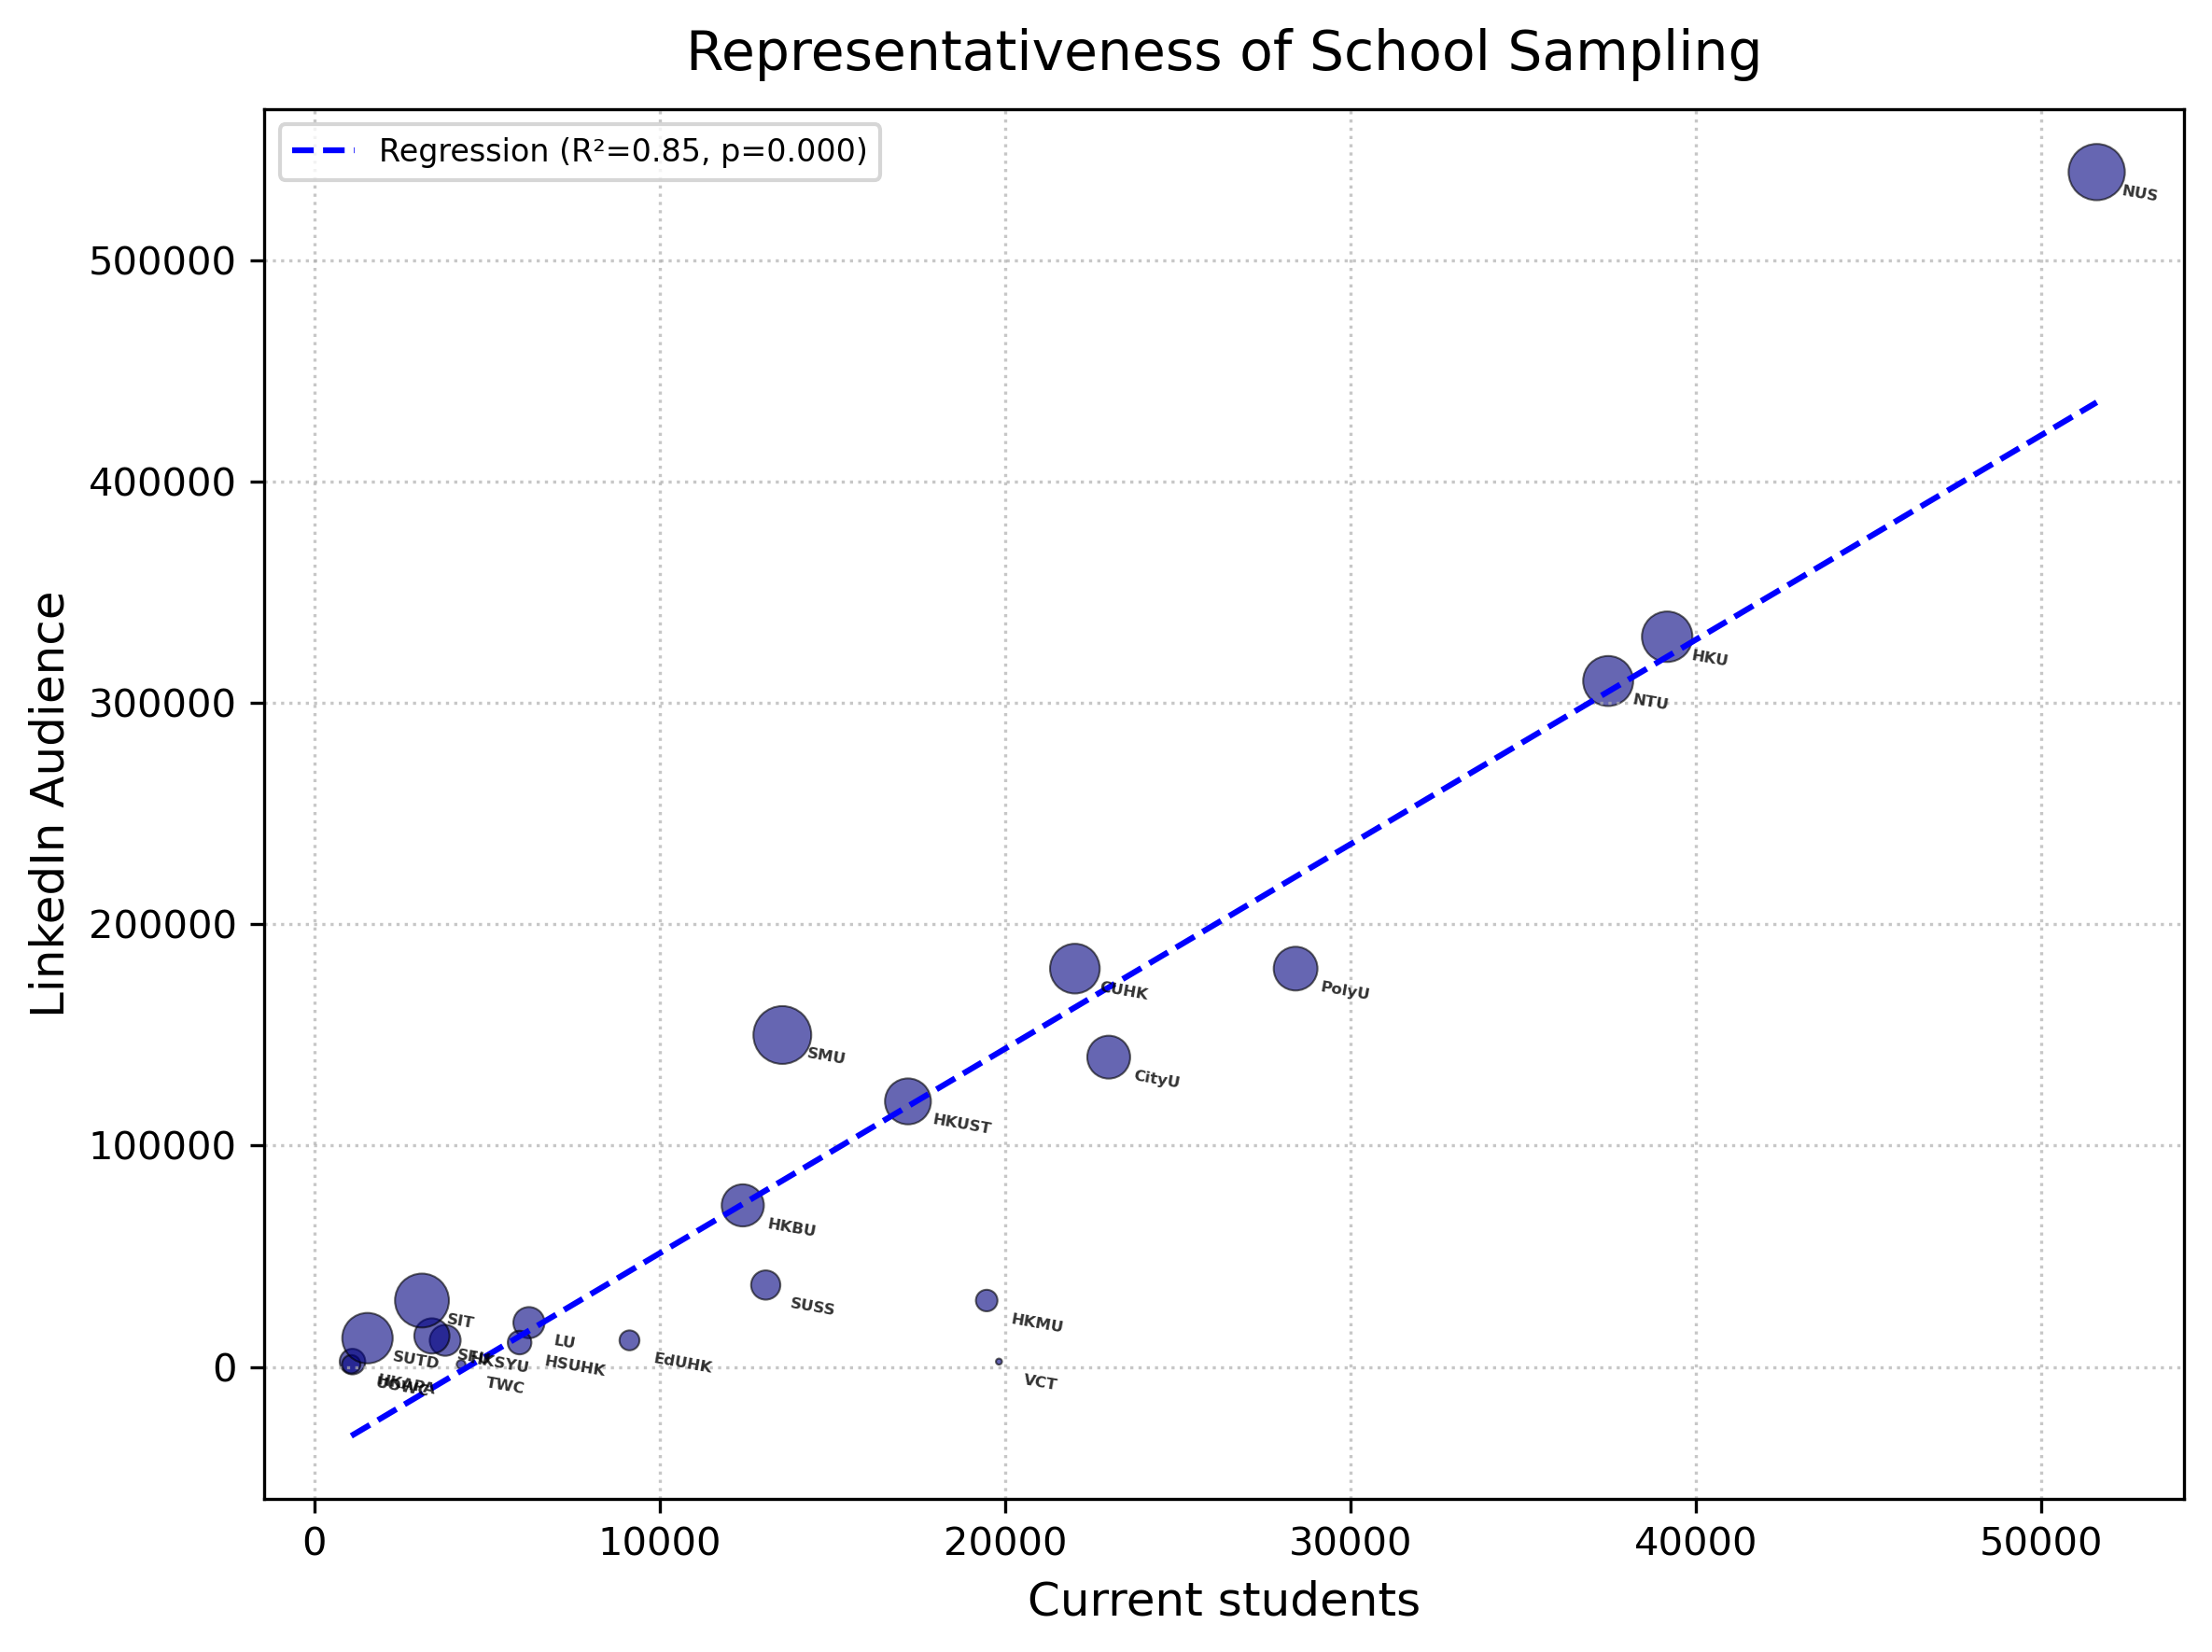

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

df = pd.read_excel('school list.xlsx')
df['Representativeness'] = (df['LinkedIn Audience'] / df['Current students'])

# Perform linear regression to assess relationship between Current students and LinkedIn Audience
slope, intercept, r_value, p_value, std_err = linregress(df['Current students'], df['LinkedIn Audience'])


# Create scatter plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot: Total Schools vs Sample Size, with Representativeness as point size
# Point size scaled to representativeness for visual emphasis
scatter = plt.scatter(df['Current students'], df['LinkedIn Audience'], 
                     s=df['Representativeness']*20,  # Scale size for visibility
                     c='navy', alpha=0.6, edgecolors='black', linewidth=0.5)

# Plot regression line
x = np.array([min(df['Current students']), max(df['Current students'])])
plt.plot(x, slope*x + intercept, color='blue', linestyle='--', 
         label=f'Regression (R²={r_value**2:.2f}, p={p_value:.3f})')


for i, school in enumerate(df['Abbreviation']):
    plt.annotate(school,
                 xy=(df['Current students'][i], df['LinkedIn Audience'][i]),  # Point to annotate
                 xytext=(6,-3),  # Position of the text (offset from the point)
                 textcoords='offset points',
                 fontsize=4,
                 fontweight='bold',  # 加粗文字
                 rotation=-10,
                 alpha=0.8,
                 va='top')


#plt.annotate('UOWC', xy=(1074, 1200), xytext=(-10,0), textcoords='offset points', fontsize=5, ha='center')

# Customize plot for academic style
plt.xlabel('Current students', fontsize=12)
plt.ylabel('LinkedIn Audience', fontsize=12)
plt.title('Representativeness of School Sampling', fontsize=14, pad=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(fontsize=8, loc='best')

# Save plot in high-quality format suitable for academic publications
plt.savefig('school_representativeness_academic.png', dpi=300, bbox_inches='tight', format='png')

# Ensure axes start at sensible values
plt.margins(0.05)
plt.tight_layout()

In [201]:
# Print summary statistics for academic reporting
print(f"Summary Statistics:")
print(f"Mean Representativeness: {df['Representativeness'].mean():.2f}%")
print(f"Standard Deviation: {df['Representativeness'].std():.2f}%")
print(f"Regression R²: {r_value**2:.2f}, p-value: {p_value:.3f}")

Summary Statistics:
Mean Representativeness: 5.06%
Standard Deviation: 3.50%
Regression R²: 0.85, p-value: 0.000
